<a href="https://colab.research.google.com/github/tpmarsha/ML2AmazonKaggle/blob/master/Category_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
from collections import defaultdict
import time
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re




In [0]:
# def read_json(f):
#   for l in open(f,"r"):
#     yield eval(l)

In [0]:
# f = "C:/Users/Hewitt/Documents/GitHub/ML2_FinalProject/train.json"
# labels = ['Men','Women','Baby', 'Boys','Girls']
# for l in read_json(f):
#     start_time = time.time()
#     reviewHash, reviewText, category = l['reviewHash'],l['reviewText'],l['categories']
#     flat_category = [item for sublist in category for item in sublist]
#     label = [label for label in labels if
#              any(label in str for str in flat_category)] 
# #     print(label[0])
#     df = df.append({'ReviewHash': reviewHash,
#                     'ReviewText': reviewText,
#                    'CategoryLabel': label[0]}, ignore_index=True)
# #     print("--- %s seconds ---" % (time.time() - start_time))
# df.to_csv("train.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
root_path = 'content/drive/My Drive/Team 3 Kaggle Competition ML2/'
df= pd.read_csv(root_path + 'train_CategoryPrediction.csv',
               index_col=0)
df.head(5)


FileNotFoundError: ignored

In [0]:
display(df['CategoryLabel'].value_counts())

Women    141303
Men       51530
Baby       3324
Girls      2191
Boys       1652
Name: CategoryLabel, dtype: int64

In [0]:
Replace_by_space_re = re.compile('[/(){}\[\]\|@,;]')
Bad_symbols_re = re.compile('[^0-9a-z #+_]')
Stopwords = set(stopwords.words('english'))

def clean_text(text):
    text=str(text)
    text=text.lower()
    text=Replace_by_space_re.sub(' ', text)
    text=Bad_symbols_re.sub('', text)
    text= ' '.join(word for word in text.split() if word not in Stopwords)
    return text

df['ReviewText'] = df['ReviewText'].apply(clean_text)
print(df.head(5))
### Word Size
print(df['ReviewText'].apply(lambda x: len(x.split(' '))).sum())
### Max Review Length
print(df['ReviewText'].apply(lambda x: len(x.split(' '))).max())

df['tokens_length'] = df['ReviewText'].apply(lambda x: len(x.split(' ')))
df[df.tokens_length==2046].ReviewText


   ReviewHash                                         ReviewText CategoryLabel
0  R798569390  model picture rolled top actually high waisted...         Women
1  R436443063  love look bra wanted however cup size band siz...         Women
2  R103439446  comfortable wearing wedding band little diamon...         Women
3  R486351639  like look top really looks cute buton closer l...         Women
4  R508664275  im quite small xs fits like regular tshirt imp...         Women
5889335
2046


164763    kind icebreaker oasis shirt last week decided ...
Name: ReviewText, dtype: object

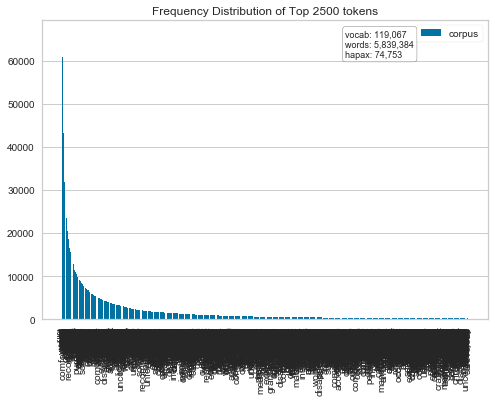

In [0]:
### Generate words count & histograms
from yellowbrick.text import FreqDistVisualizer
v=CountVectorizer()
d=v.fit_transform(df['ReviewText'])
f=v.get_feature_names()

visualizer = FreqDistVisualizer(features=f, orient='v', n=2500)
visualizer.fit(d)
visualizer.show()

In [0]:
from nltk import FreqDist
df['tokenized'] = df['ReviewText'].apply(lambda x: x.split(' '))
# df.head(5)
all_words = [word for item in list(df['tokenized']) for word in item]
fdist = FreqDist(all_words)
print(len(fdist)) # number of unique words
# choose k and visually inspect the bottom 10 words of the top k
k = 10000
top_k_words = fdist.most_common(k)
print(top_k_words[-10:])

k = 5000
top_k_words = fdist.most_common(k)
print(top_k_words[-10:])

k = 2000
top_k_words = fdist.most_common(k)
print(top_k_words[-10:])

k = 1000
top_k_words = fdist.most_common(k)
print(top_k_words[-10:])

k = 500
top_k_words = fdist.most_common(k)
print(top_k_words[-10:])

k = 100
top_k_words = fdist.most_common(k)
print(top_k_words[-10:])


123375
[('toesi', 19), ('spd', 19), ('44#34', 19), ('gifti', 19), ('braces', 19), ('poolside', 19), ('understandable', 19), ('1314', 19), ('singing', 19), ('approve', 19)]
[('tracking', 67), ('handled', 67), ('eternity', 67), ('dishes', 67), ('pilates', 67), ('reads', 67), ('http', 67), ('score', 67), ('kudos', 67), ('neoprene', 67)]
[('satin', 320), ('smart', 320), ('manufacturers', 320), ('def', 319), ('mark', 319), ('dr', 318), ('beginning', 318), ('amazoncom', 318), ('charge', 318), ('rolled', 317)]
[('saying', 888), ('colored', 887), ('nicer', 885), ('figured', 884), ('skechers', 883), ('16', 881), ('rough', 877), ('flexible', 876), ('collar', 872), ('affordable', 872)]
[('hoping', 2154), ('making', 2152), ('women', 2148), ('sock', 2146), ('dresses', 2145), ('womens', 2142), ('okay', 2136), ('zipper', 2119), ('pain', 2118), ('month', 2099)]
[('style', 10241), ('lot', 10235), ('fabric', 10032), ('two', 9959), ('put', 9898), ('keep', 9890), ('cant', 9868), ('worn', 9802), ('since', 

In [0]:
# define a function only to keep words in the top k words
k=2500
top_k_words,_ = zip(*fdist.most_common(k))
top_k_words = set(top_k_words)
def keep_top_k_words(text):
    return [word for word in text if word in top_k_words]

df['tokenized'] = df['tokenized'].apply(keep_top_k_words)

# document length
df['doc_len'] = df['tokenized'].apply(lambda x: len(x))
doc_lengths = list(df['doc_len'])

print("length of list:",len(doc_lengths),
      "\naverage document length", np.average(doc_lengths),
      "\nminimum document length", min(doc_lengths),
      "\nmaximum document length", max(doc_lengths))

length of list: 200000 
average document length 25.805625 
minimum document length 0 
maximum document length 1554


In [0]:
X =df.ReviewText
y= df.CategoryLabel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

tfidf = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                 ])
start_time = time.time()
tfidf.fit(X_train, y_train)

y_pred = tfidf.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred, target_names=y.unique()))


C:\Users\Hewitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hewitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Hewitt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--- 217.68828463554382 seconds ---
accuracy 0.784025
              precision    recall  f1-score   support

       Women       0.48      0.56      0.52       665
        Baby       0.19      0.26      0.22       330
        Boys       0.10      0.14      0.12       438
         Men       0.67      0.60      0.64     10306
       Girls       0.85      0.87      0.86     28261

   micro avg       0.78      0.78      0.78     40000
   macro avg       0.46      0.49      0.47     40000
weighted avg       0.79      0.78      0.78     40000



In [0]:
#Initialize TFIDF vectorizer that turn collection of document to sparse matrix of ngram from 1 to 3
ngram = TfidfVectorizer(ngram_range=(1,3), min_df=1, use_idf=True, smooth_idf=True)
#Vectorize the training data
start_time = time.time()
X_train_vector = ngram.fit_transform(X_train)
#Vectorize the testing data
X_test_vector = ngram.transform(X_test)
clf = LogisticRegression(n_jobs=1, C=1e5)
clf.fit(X_train_vector,y_train)
#Prediction
y_pred = clf.predict(X_test_vector)

print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred, target_names=y.unique()))


C:\Users\Hewitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hewitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


--- 306.3920817375183 seconds ---
accuracy 0.84195
              precision    recall  f1-score   support

       Women       0.80      0.60      0.69       665
        Baby       0.59      0.28      0.39       330
        Boys       0.58      0.12      0.20       438
         Men       0.75      0.69      0.72     10306
       Girls       0.87      0.92      0.90     28261

   micro avg       0.84      0.84      0.84     40000
   macro avg       0.72      0.52      0.58     40000
weighted avg       0.84      0.84      0.84     40000



In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
n_most_common_words = 2500 # based on the inspection of the words counts above
max_len = 1554 # based on max document length above after filtering for top 2500 words

tokenizer = Tokenizer(num_words=n_most_common_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_LSTM = pad_sequences(sequences, maxlen=max_len)
y_LSTM = to_categorical(df.CategoryLabel.factorize()[0], num_classes=5)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_LSTM, y_LSTM, test_size=0.2, random_state = 42, stratify=y)

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM
# from tensorflow.core.protobuf import rewriter_config_pb2
# from tensorflow.compat.v1.keras.backend import set_session
# from tensorflow.keras.backend import clear_session  
# # # For easy reset of notebook state.
# clear_session()
# # #Borrow StackoverFlow for AlreadyExistError
# config_proto = tf.compat.v1.ConfigProto
# # off = rewriter_config_pb2.RewriterConfig.OFF
# # config_proto.graph_options.rewrite_options.arithmetic_optimization = off
# session = tf.compat.v1.Session(config=config_proto)
# set_session(session)
# ##
embedding_size = 300
model = Sequential()
model.add(Embedding(n_most_common_words, embedding_size, input_length=X_LSTM.shape[1]))
model.add(Bidirectional(LSTM(128, dropout=0.7, recurrent_dropout=0.7)))
model.add(Dense(y_LSTM.shape[1], activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1554, 300)         750000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               439296    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 1,190,581
Trainable params: 1,190,581
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
start_time = time.time()
model.fit(X_train_lstm, y_train_lstm, batch_size=128, validation_split=0.2)
prediction_probas = model.predict(X_test_lstm)
y_pred = [np.argmax(pred) for pred in prediction_probas]

print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred, target_names=y.unique()))
